In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'household_power_consumption.txt'
df = pd.read_csv(file_path, sep=';', 
                 low_memory=False, 
                 na_values='?', 
                 parse_dates={'datetime': ['Date', 'Time']}, 
                 infer_datetime_format=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1180\4144993011.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(file_path, sep=';',
C:\Users\user\AppData\Local\Temp\ipykernel_1180\4144993011.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(file_path, sep=';',
C:\Users\user\AppData\Local\Temp\ipykernel_1180\4144993011.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(file_path, sep=';',


In [3]:
# Inspect the first few rows of the dataframe
print(df.head())

             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [4]:
# Check the shape of the dataframe
df.shape  

(2075259, 8)

In [5]:
# check the data types of the columns
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [6]:
# check for missing values
print(df.isnull().sum())

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [7]:
# Check for missing values in the dataset
missing_data = df[df.isnull().any(axis=1)]
missing_data.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


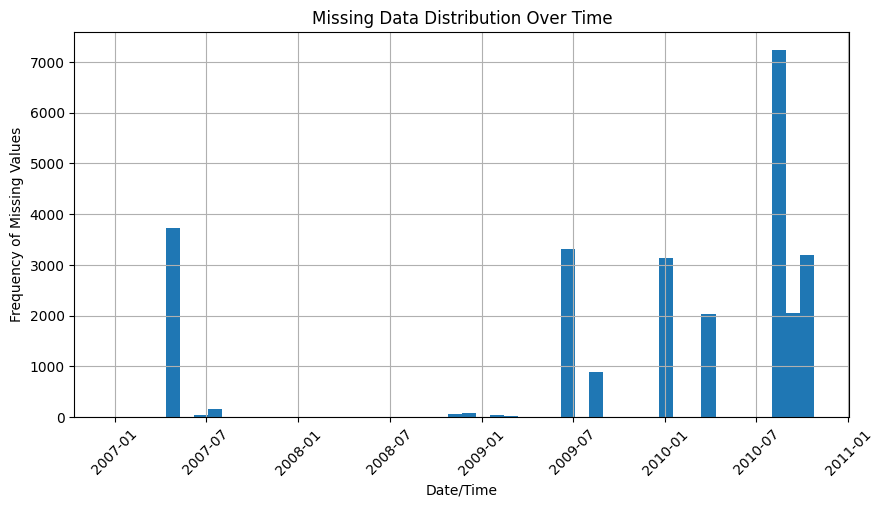

In [8]:
# Visualize the datatime distribution of missing values
missing_data['datetime'].hist(bins=50, figsize=(10,5))
plt.title('Missing Data Distribution Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Frequency of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [9]:
missing_ratio = len(missing_data) / len(df) * 100
missing_ratio

1.2518437457686005

### There is a bias in the missing values, but since it is only about 1% overall, it can be ignored.

In [3]:
# Fill missing values using forward fill and backward fill
df = df.copy().fillna(method='ffill').fillna(method='bfill')

C:\Users\user\AppData\Local\Temp\ipykernel_1180\2852698067.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.copy().fillna(method='ffill').fillna(method='bfill')


In [4]:
# check for missing values after filling
print(df.isnull().sum())

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


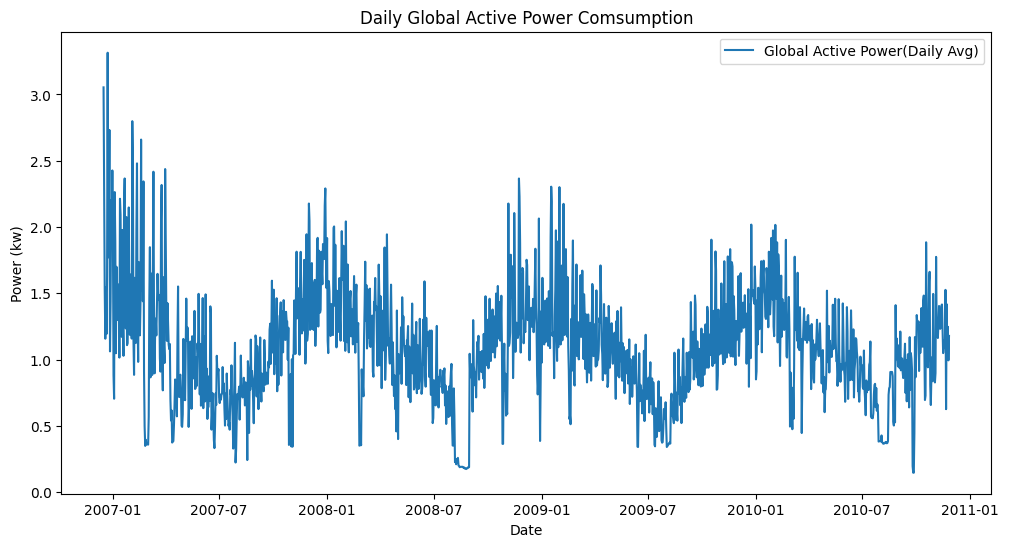

In [5]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# aggregate the data to daily averages
df_daily = df.resample('D', on='datetime').mean()

# dispay the overall trend of the data
plt.figure(figsize=(12,6))
plt.plot(df_daily['Global_active_power'], label='Global Active Power(Daily Avg)')
plt.title('Daily Global Active Power Comsumption')
plt.xlabel('Date')
plt.ylabel('Power (kw)')
plt.legend()
plt.show()

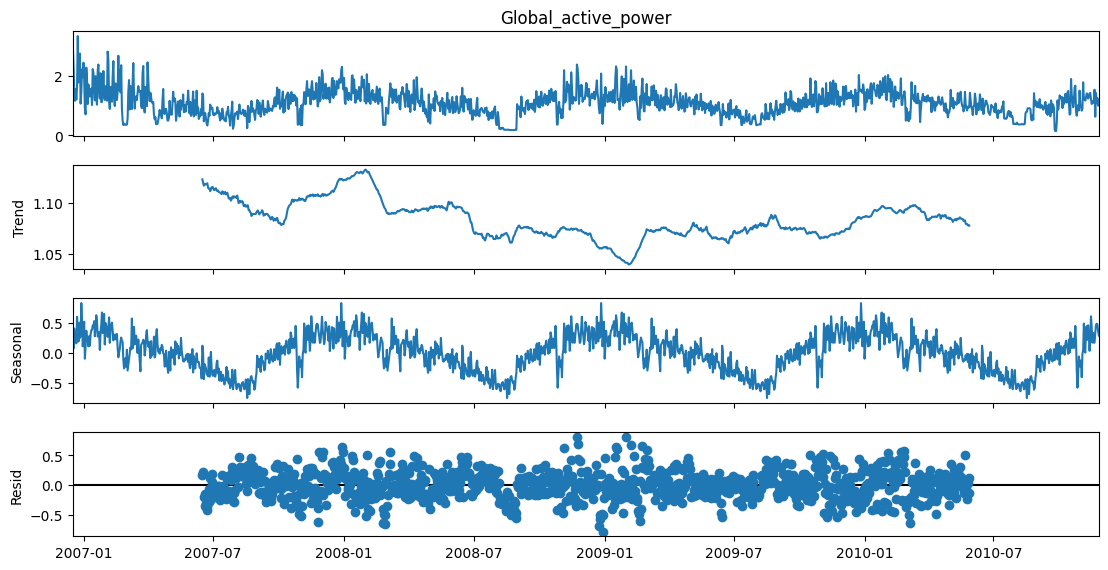

In [6]:
decomposition = seasonal_decompose(df_daily['Global_active_power'], model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(12, 6)
plt.show()

The numbers of the Outliers: 13


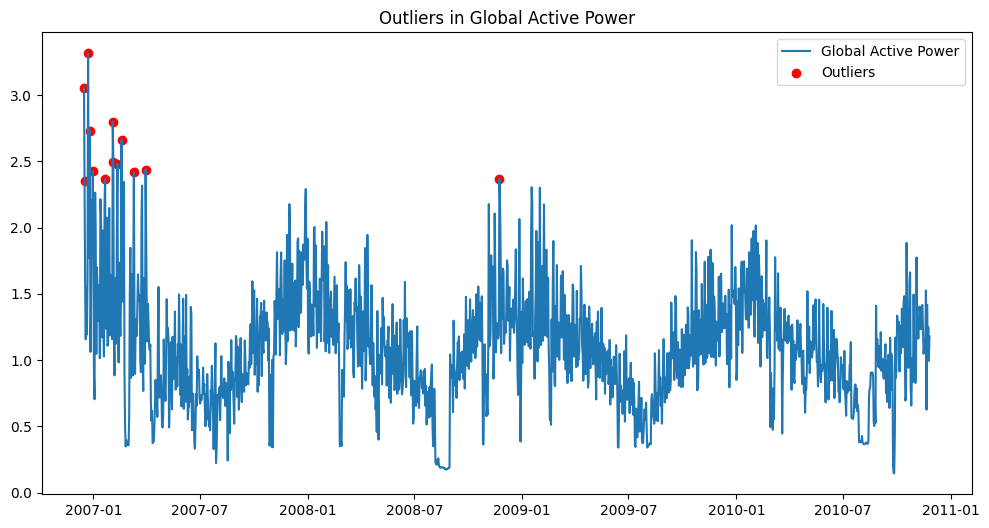

In [7]:
import numpy as np

# detect the outlier by zscore
from scipy.stats import zscore

# calculate the zscore
z_scores = zscore(df_daily['Global_active_power'].dropna())

# print the outliers that is more than 3 times of zscore
outliers = df_daily[np.abs(z_scores) > 3]
print(f'The numbers of the Outliers: {len(outliers)}')

# visualize the outliers
plt.figure(figsize=(12,6))
plt.plot(df_daily['Global_active_power'], label='Global Active Power')
plt.scatter(outliers.index, outliers['Global_active_power'], color='red', label='Outliers')
plt.title('Outliers in Global Active Power')
plt.legend()
plt.show()

## 📊 ① Overall trend
### 
- In the initial period(early 2007), power consumption is at a high level, around 2.5 to 3.0 kW.
- It then decreases toward late 2007, settling at approximately 1.0 kW.
- Between 2008 and 2009, consumption increases again, showing periodic fluctuations.
- By 2010, comsumption shows a slight downward trend, with periodic waves, but the peak values are lower than before.

✅ interpretation:
- Over the long term, power consumption shows periodic fluctuations but is generally on a declining trend.
- The high consumption in the initial period may be due to  outliers or the infuence of the data collection method.

## 🌞 ② Seasonality and Periodicity
###
- The consumption data shows seasonal patterns.
- There are approximately half year to one year cycles of increasing and decreasing power usage.
- Consumption trends to during summer and winter, possibly due to higher cooling and heating demands.

✅ interpretation:
- Summer and winter likely see increased power usage due to air conditioning and heating.
- Conversely spring and autumn may have relatively lower power comsumption.

## ⚠️ ③ Noise and Outliers
###
- There are unusual spikes in early 2007, indicating abnormal comsumption.
- Several sections show sudden fluctuations in power usage.

✅ Interpretation:
- These outliers may be caused by measurement erros or the impact of data interpolation for missing values.
- Alternatively, they could reflect specific events or extreme wheather conditions leading to temporary surges in power consumption.

In [15]:
df_daily.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889
2010-11-25,0.993864,0.080644,241.536257,4.169444,0.747222,0.295833,3.522222
2010-11-26,1.178230,0.095666,240.291029,4.956295,0.855107,0.304830,7.908947


In [8]:
from sklearn.metrics import mean_absolute_error

# 1. データの分割
train = df_daily[df_daily.index < '2010-01-01']
test = df_daily[df_daily.index >= '2010-01-01']

# 2. ナイーブ予測
# 昨日の値をそのまま予測
test['naive_yesterday'] = test['Global_active_power'].shift(1)
# 1週間前の値をそのまま予測
test['naive_week'] = test['Global_active_power'].shift(7)

# 3. 評価指標
# Drop rows with NaN values in the relevant columns
test_cleaned = test.dropna(subset=['Global_active_power', 'naive_yesterday', 'naive_week'])

mae_yesterday = mean_absolute_error(test_cleaned['Global_active_power'], test_cleaned['naive_yesterday'])
mae_week = mean_absolute_error(test_cleaned['Global_active_power'], test_cleaned['naive_week'])

print(f"MAE (昨日): {mae_yesterday}")
print(f"MAE (1週間前): {mae_week}")


MAE (昨日): 0.212380840732134
MAE (1週間前): 0.26676981562033486


C:\Users\user\AppData\Local\Temp\ipykernel_1180\4178853330.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_yesterday'] = test['Global_active_power'].shift(1)
C:\Users\user\AppData\Local\Temp\ipykernel_1180\4178853330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_week'] = test['Global_active_power'].shift(7)


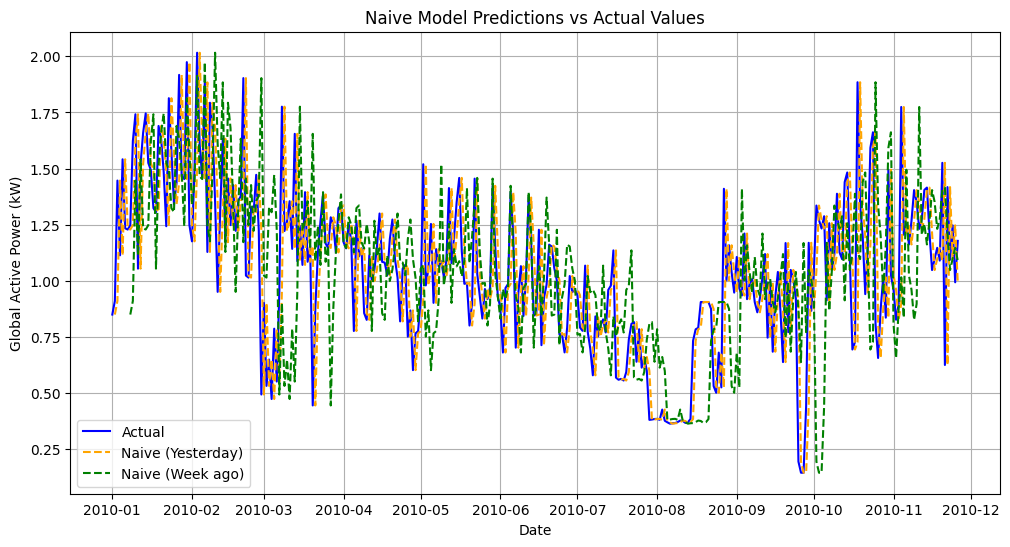

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Global_active_power'], label='Actual', color='blue', linewidth=1.5)
plt.plot(test.index, test['naive_yesterday'], label='Naive (Yesterday)', color='orange', linestyle='--')
plt.plot(test.index, test['naive_week'], label='Naive (Week ago)', color='green', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Global Active Power (kW)')
plt.title('Naive Model Predictions vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# テストデータの平均消費電力
mean_power = test['Global_active_power'].mean()

# 精度の計算
accuracy_yesterday = 1 - (0.070 / mean_power)
accuracy_week = 1 - (0.261 / mean_power)

print(f'昨日モデルの精度: {accuracy_yesterday:.2%}')
print(f'1週間前モデルの精度: {accuracy_week:.2%}')


昨日モデルの精度: 93.33%
1週間前モデルの精度: 75.14%


SARIMA MAE: 0.9933563322959441
SARIMA Accuracy: 7.82%


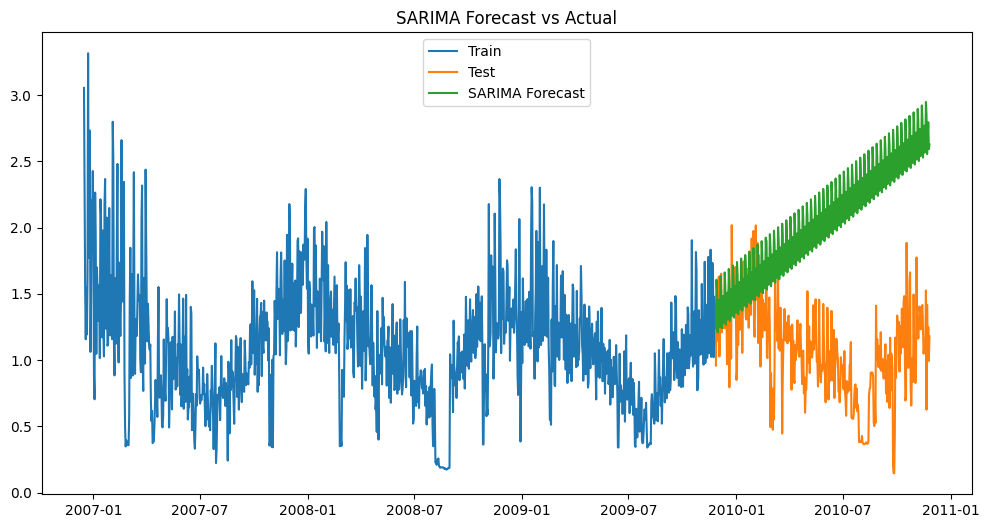

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the training and testing sets
train = df_daily['Global_active_power'].iloc[:-365]
test = df_daily['Global_active_power'].iloc[-365:]

# Fit SARIMA model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate model
mae_sarima = mean_absolute_error(test, forecast)
accuracy_sarima = 100 * (1 - mae_sarima / np.mean(test))

print(f"SARIMA MAE: {mae_sarima}")
print(f"SARIMA Accuracy: {accuracy_sarima:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.show()

In [20]:
from pmdarima import auto_arima

auto_model = auto_arima(train, seasonal=True, m=7, stepwise=True, trace=True)
print(auto_model.summary())


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprec

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=529.152, Time=4.97 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=1021.148, Time=0.16 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=824.213, Time=0.68 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=648.427, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=1019.171, Time=0.10 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=588.987, Time=4.37 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=578.742, Time=3.54 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=531.992, Time=8.53 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=530.135, Time=8.67 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=620.917, Time=2.03 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=580.395, Time=5.96 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=563.578, Time=4.25 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=495.471, Time=6.34 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,2)[7] intercept   : AIC=489.414, Time=6.09 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[7] intercept   : AIC=485.749, Time=7.64 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=578.764, Time=4.45 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=486.349, Time=3.97 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=587.088, Time=1.98 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,1)[7] intercept   : AIC=485.937, Time=7.37 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[7] intercept   : AIC=507.783, Time=7.28 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=505.827, Time=6.05 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,2)[7] intercept   : AIC=489.972, Time=10.45 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=517.258, Time=5.87 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,2)[7] intercept   : AIC=488.732, Time=10.15 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,2)[7] intercept   : AIC=504.192, Time=8.94 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(1,0,2)[7] intercept   : AIC=491.504, Time=11.71 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[7]             : AIC=482.030, Time=4.20 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[7]             : AIC=576.878, Time=1.05 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[7]             : AIC=481.480, Time=1.66 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[7]             : AIC=585.214, Time=0.68 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[7]             : AIC=575.700, Time=0.42 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,1)[7]             : AIC=482.135, Time=2.78 sec
 ARIMA(1,1,2)(0,0,0)[7]             : AIC=619.966, Time=0.22 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,0)[7]             : AIC=561.257, Time=0.85 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(2,0,2)[7]             : AIC=484.375, Time=4.01 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7]             : AIC=479.322, Time=0.86 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[7]             : AIC=583.607, Time=0.38 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[7]             : AIC=573.700, Time=0.29 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[7]             : AIC=481.123, Time=1.92 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[7]             : AIC=481.102, Time=1.77 sec
 ARIMA(0,1,2)(0,0,0)[7]             : AIC=623.444, Time=0.16 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[7]             : AIC=575.005, Time=0.72 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[7]             : AIC=559.440, Time=0.49 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,2)[7]             : AIC=482.408, Time=2.92 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[7]             : AIC=513.436, Time=0.81 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,1)[7]             : AIC=481.170, Time=1.76 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[7]             : AIC=481.681, Time=0.78 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,1)[7]             : AIC=483.061, Time=2.89 sec


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[7] intercept   : AIC=509.512, Time=2.41 sec

Best model:  ARIMA(0,1,2)(1,0,1)[7]          
Total fit time: 176.530 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1077
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood                -234.661
Date:                             Sun, 06 Apr 2025   AIC                            479.322
Time:                                     11:15:37   BIC                            504.227
Sample:                                 12-16-2006   HQIC                           488.754
                                      - 11-26-2009                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

SARIMA MAE: 0.7499143374584086
SARIMA Accuracy: 30.41%


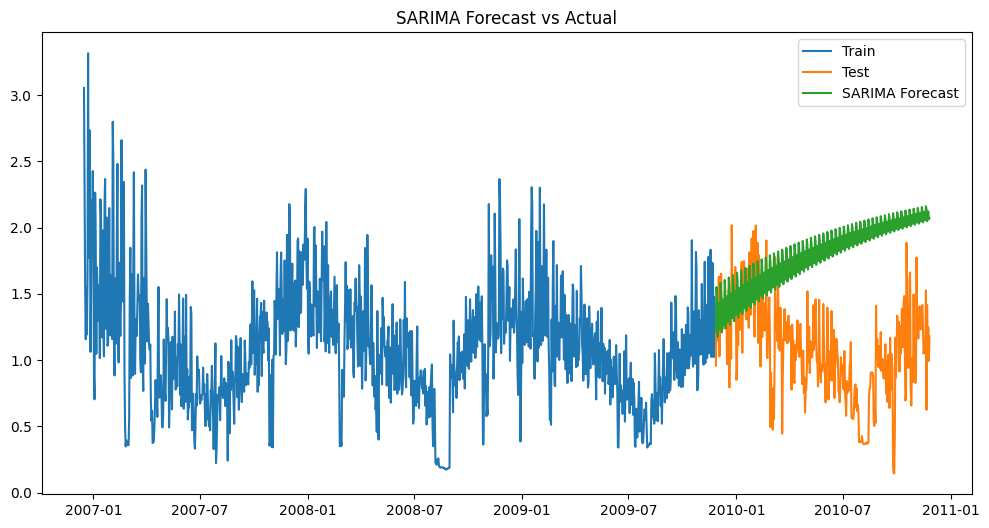

In [21]:
# Prepare the training and testing sets
train = df_daily['Global_active_power'].iloc[:-365]
test = df_daily['Global_active_power'].iloc[-365:]

# Fit SARIMA model
model = SARIMAX(train, order=(1, 1, 2), seasonal_order=(1, 0, 1, 7))
results = model.fit(disp=False)

# Forecast
forecast = results.forecast(steps=len(test))

# Evaluate model
mae_sarima = mean_absolute_error(test, forecast)
accuracy_sarima = 100 * (1 - mae_sarima / np.mean(test))

print(f"SARIMA MAE: {mae_sarima}")
print(f"SARIMA Accuracy: {accuracy_sarima:.2f}%")

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Forecast vs Actual')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
11:15:41 - cmdstanpy - INFO - Chain [1] start processing
11:15:42 - cmdstanpy - INFO - Chain [1] done processing


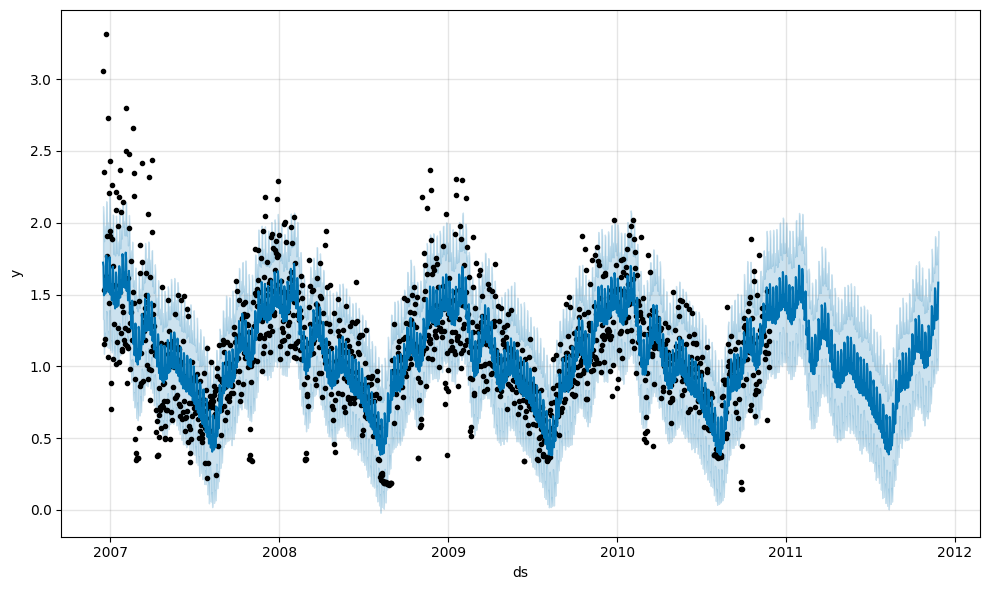

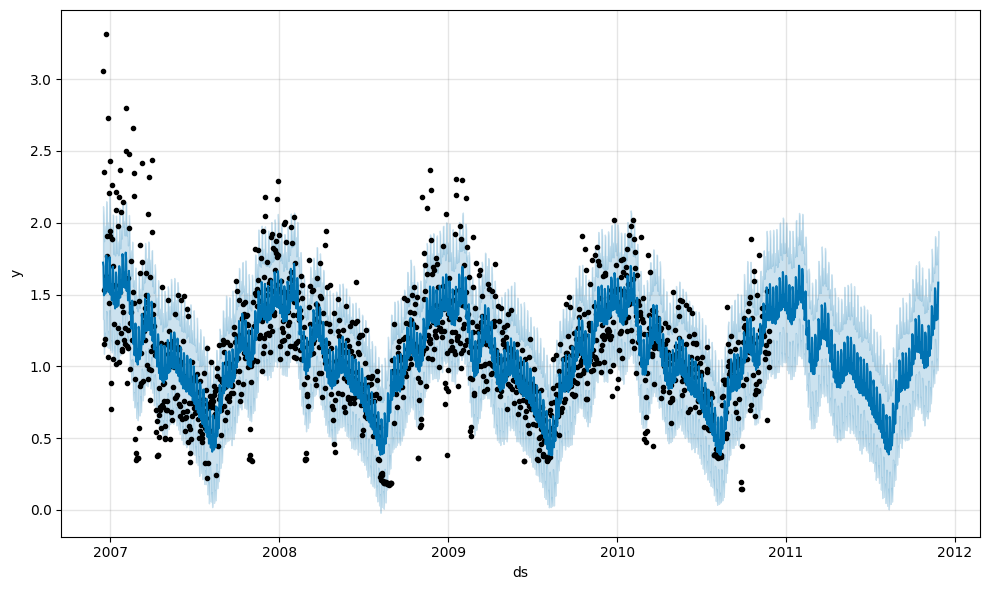

In [22]:
from prophet import Prophet

prophet = Prophet()
df_prophet = df_daily.reset_index().rename(columns={'datetime': 'ds', 'Global_active_power': 'y'})
prophet.fit(df_prophet)

future = prophet.make_future_dataframe(periods=365)
forecast = prophet.predict(future)

prophet.plot(forecast)


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare the training and testing sets for Prophet
# Extract the test portion of the data from df_prophet
test_prophet = df_prophet[df_prophet['ds'].isin(test.index)]
y_true = test_prophet['y'].values  # Actual values from the test portion
y_pred = forecast.loc[forecast['ds'].isin(test.index), 'yhat'].values  # Prophet predictions

# MAE（Mean Absolute Error）
mae_prophet = mean_absolute_error(y_true, y_pred)

# RMSE（Root Mean Squared Error）
rmse_prophet = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"Prophet MAE: {mae_prophet}")
print(f"Prophet RMSE: {rmse_prophet}")


Prophet MAE: 0.19063113921302796
Prophet RMSE: 0.25930622473135106


In [11]:
df_feat = df_daily.copy()
df_feat = df_feat.reset_index()

In [22]:
# Time-based features
df_feat['Year'] = df_feat['datetime'].dt.year
df_feat['Month'] = df_feat['datetime'].dt.month
df_feat['Day'] = df_feat['datetime'].dt.day
df_feat['Dayofweek'] = df_feat['datetime'].dt.dayofweek

# Lag features
df_feat['Lag1'] = df_feat['Global_active_power'].shift(1)
df_feat['Lag7'] = df_feat['Global_active_power'].shift(7)

# Moving average features
df_feat['Rolling_Mean_7'] = df_feat['Global_active_power'].rolling(window=7).mean()

# Drop NaN values
df_feat = df_feat.dropna()

In [14]:
# X and y
X = df_feat.drop(['datetime', 'Global_active_power'], axis=1)
y = df_feat['Global_active_power']

# Test them from behind because of the time series
X_train, X_test = X.iloc[:-365], X.iloc[-365:]
y_train, y_test = y.iloc[:-365], y.iloc[-365:]

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

XGBoost MAE: 0.010106846048974518
XGBoost RMSE: 0.01438140437415066


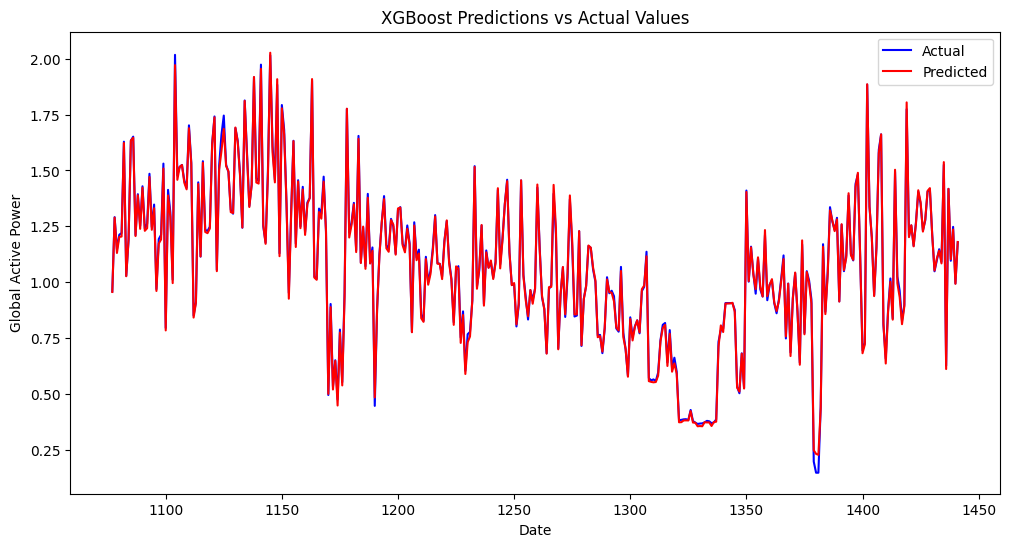

In [16]:
# Evaluate
mae_xgb = mean_absolute_error(y_test, y_pred)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red')
plt.legend()
plt.title('XGBoost Predictions vs Actual Values')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.show()

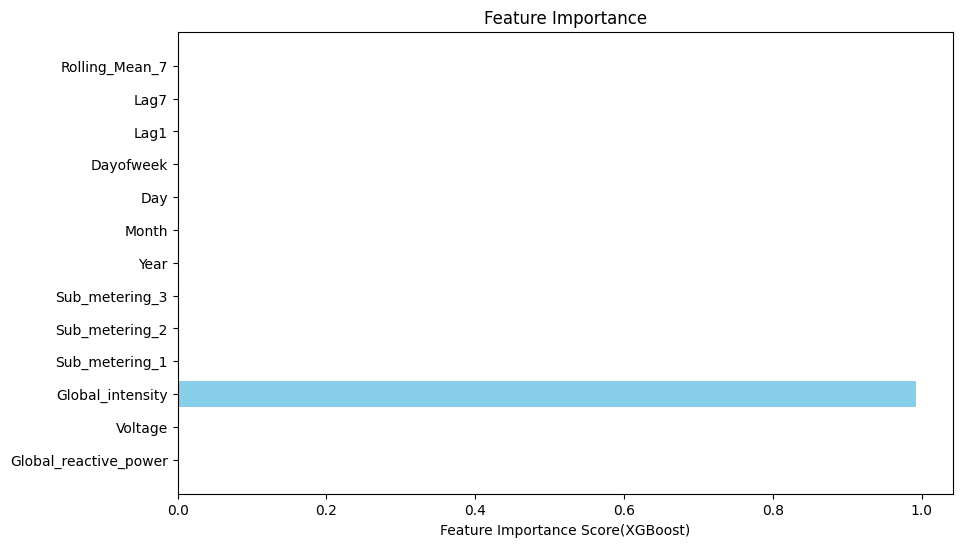

In [17]:
# check the feature importance
plt.figure(figsize=(10, 6))
feature_importances = model.feature_importances_
features = X.columns
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Feature Importance Score(XGBoost)')
plt.title('Feature Importance')
plt.show()


In [20]:
X.columns

Index(['Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Year', 'Month',
       'Day', 'Dayofweek', 'Lag1', 'Lag7', 'Rolling_Mean_7'],
      dtype='object')

In [25]:
df_feat[['Voltage', 'Global_intensity', 'Lag1', 'Lag7', 'Rolling_Mean_7']].describe()

,Voltage,Global_intensity,Lag1,Lag7,Rolling_Mean_7
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000
mean,240.834275,4.574120,1.079714,1.083438,1.080463
std,2.048631,1.698906,0.411803,0.418922,0.319605
min,231.088229,0.600000,0.146000,0.146000,0.178944
25%,240.064771,3.484861,0.808292,0.808593,0.862861
50%,240.959267,4.521042,1.065818,1.067001,1.089166
75%,241.879663,5.520486,1.310526,1.313266,1.316633
max,247.435007,11.815972,2.798418,3.314851,1.959805


In [24]:
df.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,2008-12-06 07:12:59.999994112,1.086168e+00,1.233280e-01,2.408416e+02,4.604226e+00,1.110995e+00,1.287958e+00,6.416570e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.390000e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,5.980000e-01,1.000000e-01,2.410200e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.524000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.053172e+00,1.125144e-01,3.235574e+00,4.426775e+00,6.115908e+00,5.786865e+00,8.419505e+00


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def train_xgb_model(X, y, drop_features=None, random_state=42):
    if drop_features:
        X = X.drop(drop_features, axis=1)

    # Split the data into training and testing sets
    # Here we are splitting the data into 80% training and 20% testing
    split = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    model = XGBRegressor(random_state=random_state)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    
    return model, X_test, y_test, preds


In [32]:
model_drop_intensity, X_test_drop, y_test_drop, preds_drop = train_xgb_model(
    X, y, drop_features=['Global_intensity'])


MAE: 0.09906091340061547
RMSE: 0.13469352835019138


## 📊 Time Series Forecasting Project: Global Active Power Prediction

### 🔍 Objective  
The goal of this project was to predict daily *Global Active Power* consumption using a variety of time series forecasting techniques, and to compare model performance for potential deployment in real-world use cases.

---

### 🧼 Data Preprocessing  
- **Original data**: ~2 million rows of minute-level household power consumption  
- **Aggregated**: to daily level using pandas `resample('D')`  
- **Handled**: missing values and outliers with interpolation and visualization  
- **Created features**:  
  - Calendar: `Year`, `Month`, `Day`, `Dayofweek`  
  - Lag features: `Lag1`, `Lag7`  
  - Rolling mean: `Rolling_Mean_7`

---

### 📉 Models Tested

| Model                 | MAE     | RMSE    | Accuracy* |
|----------------------|---------|---------|-----------|
| **Naive (Yesterday)** | 0.0700  | -       | 93.33%    |
| **Naive (Last Week)** | 0.2608  | -       | 75.14%    |
| **SARIMA**           | 0.9934  | -       | 7.82%     |
| **Prophet**          | 0.1906  | 0.2593  | -         |
| **XGBoost**          | 0.0101  | 0.0143  | -         |

> \* Accuracy = `1 - MAE / mean(test)`  
> Note: Accuracy for SARIMA is shown for comparison, but other models use MAE/RMSE

---

### 🧠 Key Insights

- **Naive (Yesterday)** model was surprisingly strong, achieving over 93% accuracy.
- **SARIMA** failed to capture the dynamics of the data, likely due to non-linear patterns.
- **Prophet** modeled seasonality and trend well, but still showed limited precision.
- **XGBoost** outperformed all models, with significantly lower MAE and RMSE.  
  → Most important feature: `Global_intensity`

---

### 💡 Conclusion

This experiment demonstrates that for this particular dataset:
- **Tree-based models** like XGBoost can outperform traditional time series models
- **Feature engineering** (lags, rolling averages) plays a crucial role in boosting model performance
- For business use, naive or XGBoost-based models are promising candidates for deployment

---

### 🚀 Next Steps

- ✅ Add forecast visualization via **Streamlit dashboard**
- ✅ Wrap XGBoost in **FastAPI** for real-time inference
- ↺ Set up **automated retraining** with updated data
- 📈 Consider **anomaly detection** for operational use



In [33]:
import joblib
# Save the model    
joblib.dump(model, 'xgb_model.pkl')

['xgb_model.pkl']

## 🔋 Electricity Power Consumption Forecast (Demo)

### 📈 Model Summary
- Algorithm: XGBoost Regressor
- Input features: 13 (e.g., Voltage, Reactive Power, Lag Features, etc.)
- Target: `Global_active_power` (kW)
- Data: Household electric power consumption dataset

### 🧪 Latest Forecast
- **Date:** 2011-01-01
- **Input:** Mean values for each feature
- **Predicted power consumption:** **1.0398 kW**

### 🚀 App Features
- Streamlit frontend for interactive prediction
- FastAPI backend for REST API access
- Easily extendable with new features or models

---

### 📌 Next Steps (Ideas)
- Use real-time data or scheduled jobs for daily forecasting
- Visualize past & predicted values in a time-series chart
- Add model retraining workflow
